In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import generate_and_save_data, F_model, mse_loss, compute_gradients
from optimizers import SGD, Momentum, Nesterov, AdaGrad, RMSProp, AdaDelta, Adam, AdaMax, Nadam, AMSGrad

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
EPOCHS = 5000
LEARNING_RATE = 0.005
OPTIMIZERS_TO_TEST = ["SGD", "Momentum", "Nesterov", "AdaGrad", "RMSProp", 
                      "AdaDelta", "Adam", "AdaMax", "Nadam", "AMSGrad"]
OPTIMIZATION_MODES = ["alphas", "thetas", "both"]

print("="*80)
print(f"{'EXPERIMENT CONFIGURATION':^80}")
print("="*80)
print(f"Number of Epochs: {EPOCHS}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Optimizers to Test: {len(OPTIMIZERS_TO_TEST)}")
print(f"Optimization Modes: {OPTIMIZATION_MODES}")
print("="*80)

                            EXPERIMENT CONFIGURATION                            
Number of Epochs: 5000
Learning Rate: 0.005
Optimizers to Test: 10
Optimization Modes: ['alphas', 'thetas', 'both']


data saved successfully


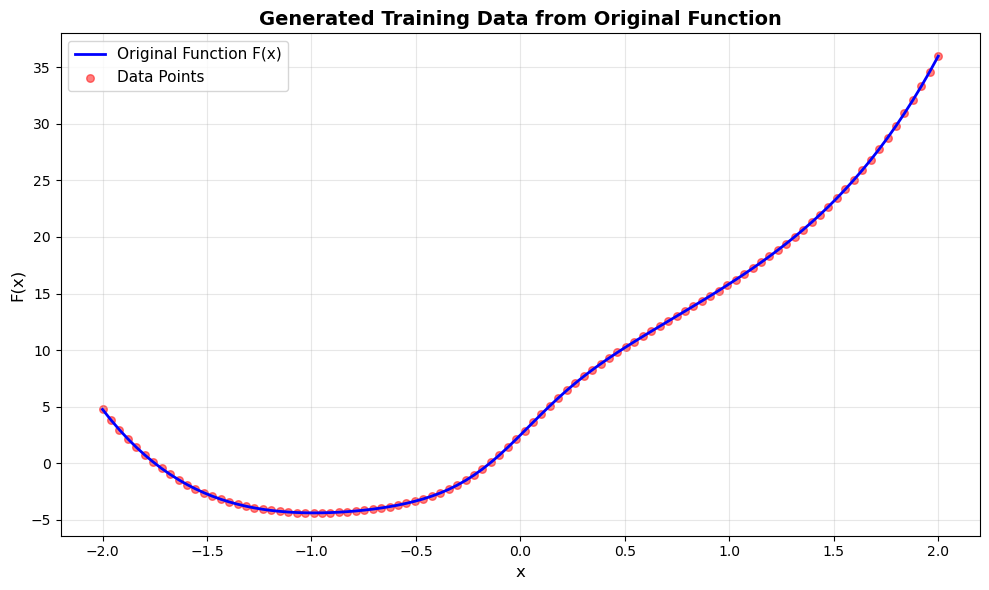

In [ ]:
x_data, y_data = generate_and_save_data(n_samples=100)

# Visualize the generated data
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'b-', linewidth=2, label='Original Function F(x)')
plt.scatter(x_data, y_data, color='red', s=30, alpha=0.5, label='Data Points')
plt.xlabel('x', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.title('Generated Training Data from Original Function', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
def get_optimizer(optimizer_name, lr):
    """Factory function to create optimizer instances based on name."""
    optimizers_map = {
        "SGD": SGD(lr),
        "Momentum": Momentum(lr),
        "Nesterov": Nesterov(lr),
        "AdaGrad": AdaGrad(lr),
        "RMSProp": RMSProp(lr),
        "AdaDelta": AdaDelta(learning_rate=1.0),  # AdaDelta typically uses lr=1.0
        "Adam": Adam(lr),
        "AdaMax": AdaMax(lr),
        "Nadam": Nadam(lr),
        "AMSGrad": AMSGrad(lr)
    }
    return optimizers_map[optimizer_name]

In [ ]:
def train_optimizer(optimizer_name, x, y, mode, epochs, lr):
    """
    Train the model using a specific optimizer and optimization mode.
    
    Args:
        optimizer_name: Name of the optimizer to use
        x: Input data
        y: Target data
        mode: 'alphas', 'thetas', or 'both'
        epochs: Number of training epochs
        lr: Learning rate
    
    Returns:
        final_mse: Final mean squared error
        loss_history: List of MSE values for each epoch
        final_alphas: Optimized alpha parameters
        final_thetas: Optimized theta parameters
    """
    # Initialize parameters randomly between 0 and 1
    np.random.seed(42)
    alphas = np.random.rand(5)
    thetas = np.random.rand(3)

    # Create optimizer instances for alphas and thetas
    opt_alpha = get_optimizer(optimizer_name, lr)
    opt_theta = get_optimizer(optimizer_name, lr)

    loss_history = []
    
    for epoch in range(epochs):
        # Compute gradients
        grad_alphas, grad_thetas = compute_gradients(x, y, alphas, thetas)

        # Update parameters based on mode
        if mode == 'alphas':
            alphas = opt_alpha.update(alphas, grad_alphas)
        elif mode == 'thetas':
            thetas = opt_theta.update(thetas, grad_thetas)
        elif mode == 'both':
            alphas = opt_alpha.update(alphas, grad_alphas)
            thetas = opt_theta.update(thetas, grad_thetas)

        # Calculate and store loss
        y_pred = F_model(x, alphas, thetas)
        loss = mse_loss(y, y_pred)
        loss_history.append(loss)
    
    final_mse = loss_history[-1]
    return final_mse, loss_history, alphas, thetas

In [ ]:
print("\n" + "="*80)
print(f"{'TRAINING IN PROGRESS':^80}")
print("="*80)

results = {}
loss_histories = {"both": {}}  # Store loss histories for 'both' mode for visualization
final_params = {}  # Store final parameters for 'both' mode

for mode in OPTIMIZATION_MODES:
    results[mode] = {}
    print(f"\n--- Optimization Mode: {mode.upper()} ---")
    
    for optimizer_name in OPTIMIZERS_TO_TEST:
        print(f"  Training with {optimizer_name}...", end=" ")
        
        final_mse, history, final_alphas, final_thetas = train_optimizer(
            optimizer_name, x_data, y_data, mode, EPOCHS, LEARNING_RATE
        )
        
        results[mode][optimizer_name] = final_mse
        
        # Store additional data for 'both' mode
        if mode == "both":
            loss_histories["both"][optimizer_name] = history
            final_params[optimizer_name] = (final_alphas, final_thetas)
        
        print(f"Final MSE: {final_mse:.6f}")

print("\n" + "="*80)
print(f"{'TRAINING COMPLETED':^80}")
print("="*80)



                              TRAINING IN PROGRESS                              

--- Optimization Mode: ALPHAS ---
  Training with SGD... Final MSE: 2.821886
  Training with Momentum... Final MSE: 2.821888
  Training with Nesterov... Final MSE: 2.786854
  Training with AdaGrad... Final MSE: 119.956749
  Training with RMSProp... Final MSE: 2.647066
  Training with AdaDelta... Final MSE: 8.753923
  Training with Adam... Final MSE: 2.844417
  Training with AdaMax... Final MSE: 2.835573
  Training with Nadam... Final MSE: 2.843917
  Training with AMSGrad... Final MSE: 3.067494

--- Optimization Mode: THETAS ---
  Training with SGD... Final MSE: 4.218111
  Training with Momentum... Final MSE: 4.216349
  Training with Nesterov... Final MSE: 4.086758
  Training with AdaGrad... Final MSE: 146.319219
  Training with RMSProp... Final MSE: 4.049449
  Training with AdaDelta... Final MSE: 82.237825
  Training with Adam... Final MSE: 5.697448
  Training with AdaMax... Final MSE: 4.124761
  Trainin

In [ ]:
print("\n\n" + "="*90)
print(f"{'FINAL MSE RESULTS SUMMARY':^90}")
print("="*90)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df.columns = ["MSE (Alphas Only)", "MSE (Thetas Only)", "MSE (Both Alphas & Thetas)"]
results_df.index.name = "Optimizer"

# Display the table
print(results_df.to_string())
print("\n" + "="*90)

# Find best optimizer for each mode
print("\nBEST PERFORMERS:")
print("-" * 90)
for col in results_df.columns:
    best_optimizer = results_df[col].idxmin()
    best_mse = results_df[col].min()
    print(f"{col:30s}: {best_optimizer:15s} (MSE = {best_mse:.6f})")
print("="*90)

# Save results to Excel
results_df.to_excel("optimization_results.xlsx")
print("\nResults saved to 'optimization_results.xlsx'")



                                FINAL MSE RESULTS SUMMARY                                 
           MSE (Alphas Only)  MSE (Thetas Only)  MSE (Both Alphas & Thetas)
Optimizer                                                                  
SGD                 2.821886           4.218111                    0.508155
Momentum            2.821888           4.216349                    0.498051
Nesterov            2.786854           4.086758                    0.131215
AdaGrad           119.956749         146.319219                   83.280737
RMSProp             2.647066           4.049449                    0.465062
AdaDelta            8.753923          82.237825                    1.178379
Adam                2.844417           5.697448                    0.712995
AdaMax              2.835573           4.124761                    0.477942
Nadam               2.843917           4.824294                    0.646712
AMSGrad             3.067494          17.705722                    1.69

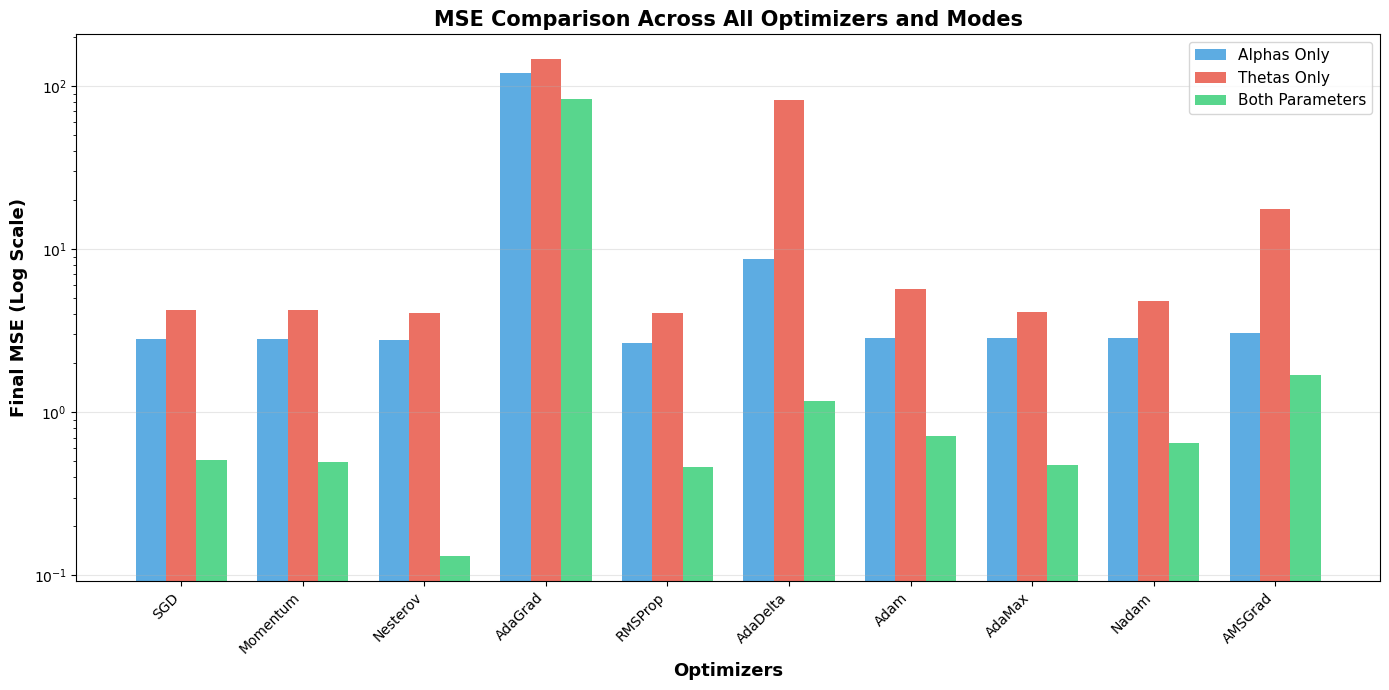

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

x_pos = np.arange(len(OPTIMIZERS_TO_TEST))
width = 0.25

# Create bars for each optimization mode
bars1 = ax.bar(x_pos - width, results_df["MSE (Alphas Only)"], width, 
               label='Alphas Only', alpha=0.8, color='#3498db')
bars2 = ax.bar(x_pos, results_df["MSE (Thetas Only)"], width, 
               label='Thetas Only', alpha=0.8, color='#e74c3c')
bars3 = ax.bar(x_pos + width, results_df["MSE (Both Alphas & Thetas)"], width, 
               label='Both Parameters', alpha=0.8, color='#2ecc71')

ax.set_xlabel('Optimizers', fontsize=13, fontweight='bold')
ax.set_ylabel('Final MSE (Log Scale)', fontsize=13, fontweight='bold')
ax.set_title('MSE Comparison Across All Optimizers and Modes', fontsize=15, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(OPTIMIZERS_TO_TEST, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_yscale('log')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

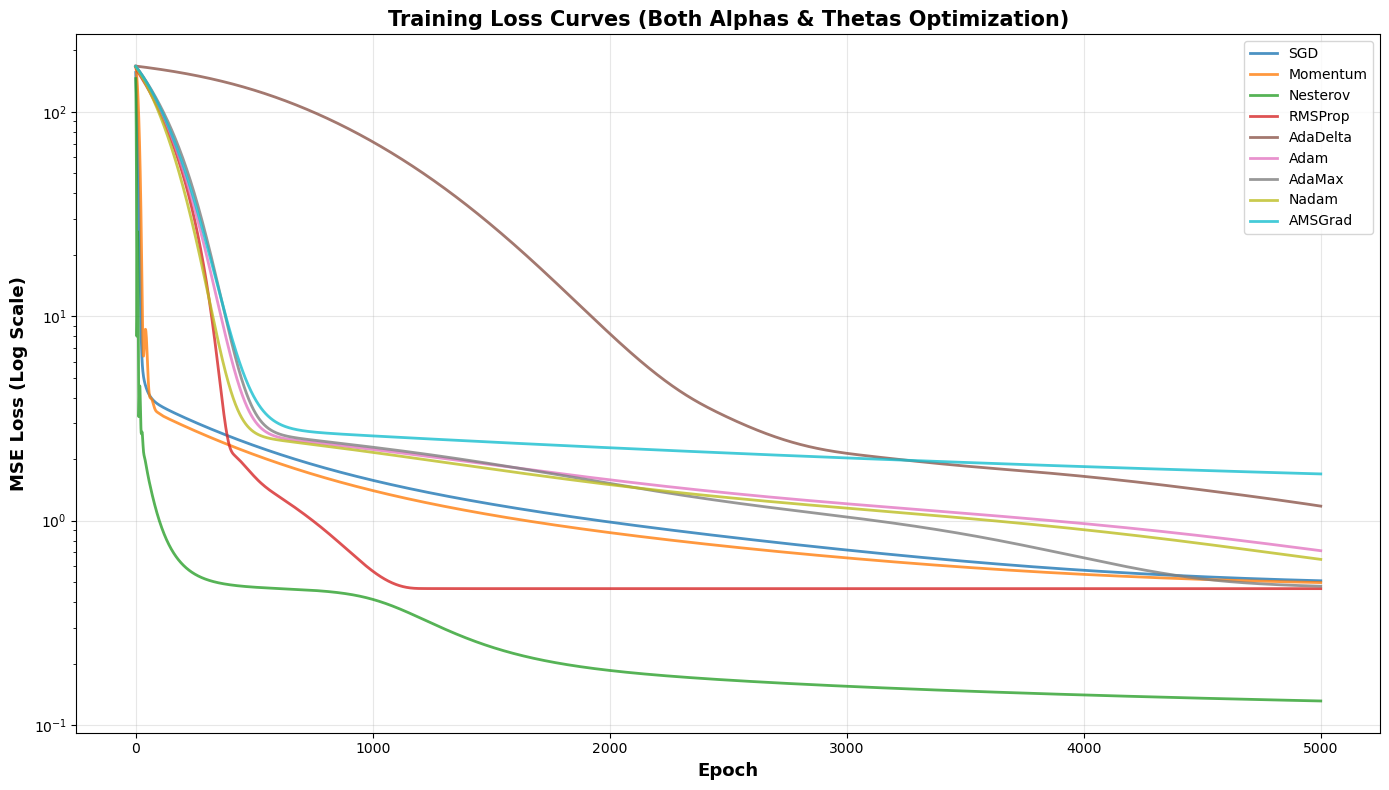

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot loss curves only for optimizers that converged well (MSE < 10)
converged_optimizers = [opt for opt in OPTIMIZERS_TO_TEST 
                        if loss_histories["both"][opt][-1] < 10]

colors = plt.cm.tab10(np.linspace(0, 1, len(converged_optimizers)))

for idx, optimizer_name in enumerate(converged_optimizers):
    history = loss_histories["both"][optimizer_name]
    ax.plot(range(EPOCHS), history, label=optimizer_name, 
            linewidth=2, color=colors[idx], alpha=0.8)

ax.set_xlabel('Epoch', fontsize=13, fontweight='bold')
ax.set_ylabel('MSE Loss (Log Scale)', fontsize=13, fontweight='bold')
ax.set_title('Training Loss Curves (Both Alphas & Thetas Optimization)', 
             fontsize=15, fontweight='bold')
ax.legend(fontsize=10, loc='upper right')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

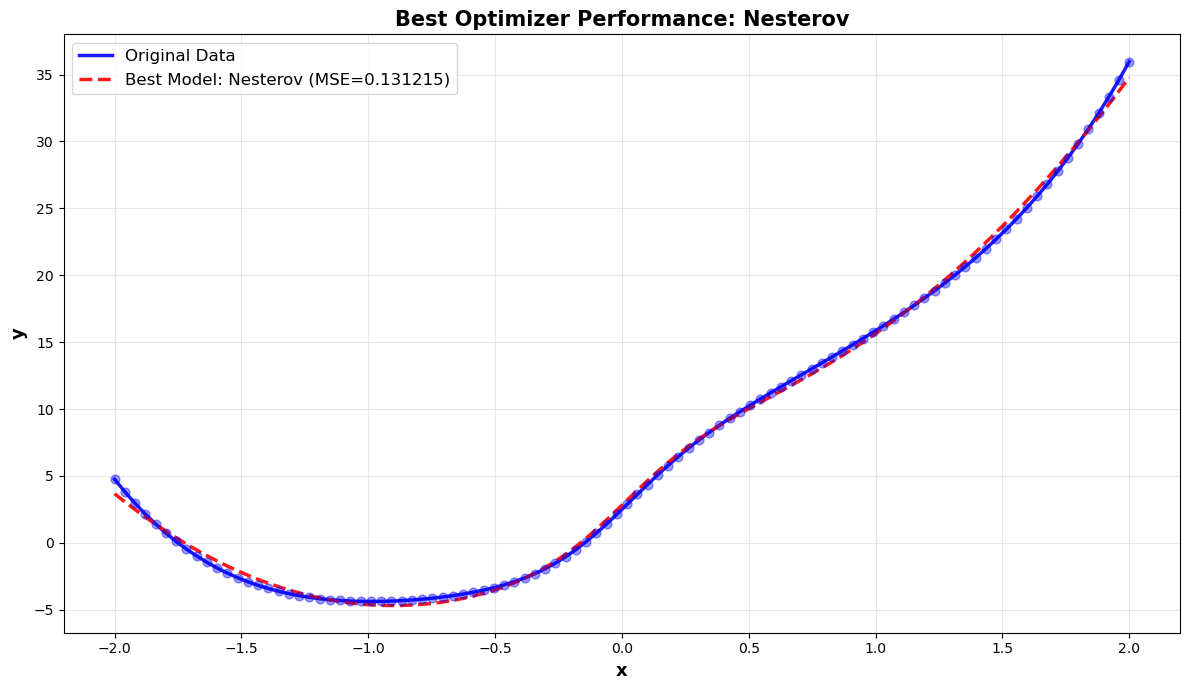

In [ ]:
# Find the best optimizer (lowest MSE in 'both' mode)
best_optimizer = results_df['MSE (Both Alphas & Thetas)'].idxmin()
best_mse = results_df['MSE (Both Alphas & Thetas)'].min()
best_alphas, best_thetas = final_params[best_optimizer]

# Generate predictions using the best model
y_pred_best = F_model(x_data, best_alphas, best_thetas)

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x_data, y_data, 'b-', linewidth=2.5, label='Original Data', alpha=0.9)
ax.plot(x_data, y_pred_best, 'r--', linewidth=2.5, 
        label=f'Best Model: {best_optimizer} (MSE={best_mse:.6f})', alpha=0.9)
ax.scatter(x_data, y_data, color='blue', s=40, alpha=0.4, zorder=5)

ax.set_xlabel('x', fontsize=13, fontweight='bold')
ax.set_ylabel('y', fontsize=13, fontweight='bold')
ax.set_title(f'Best Optimizer Performance: {best_optimizer}', 
             fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

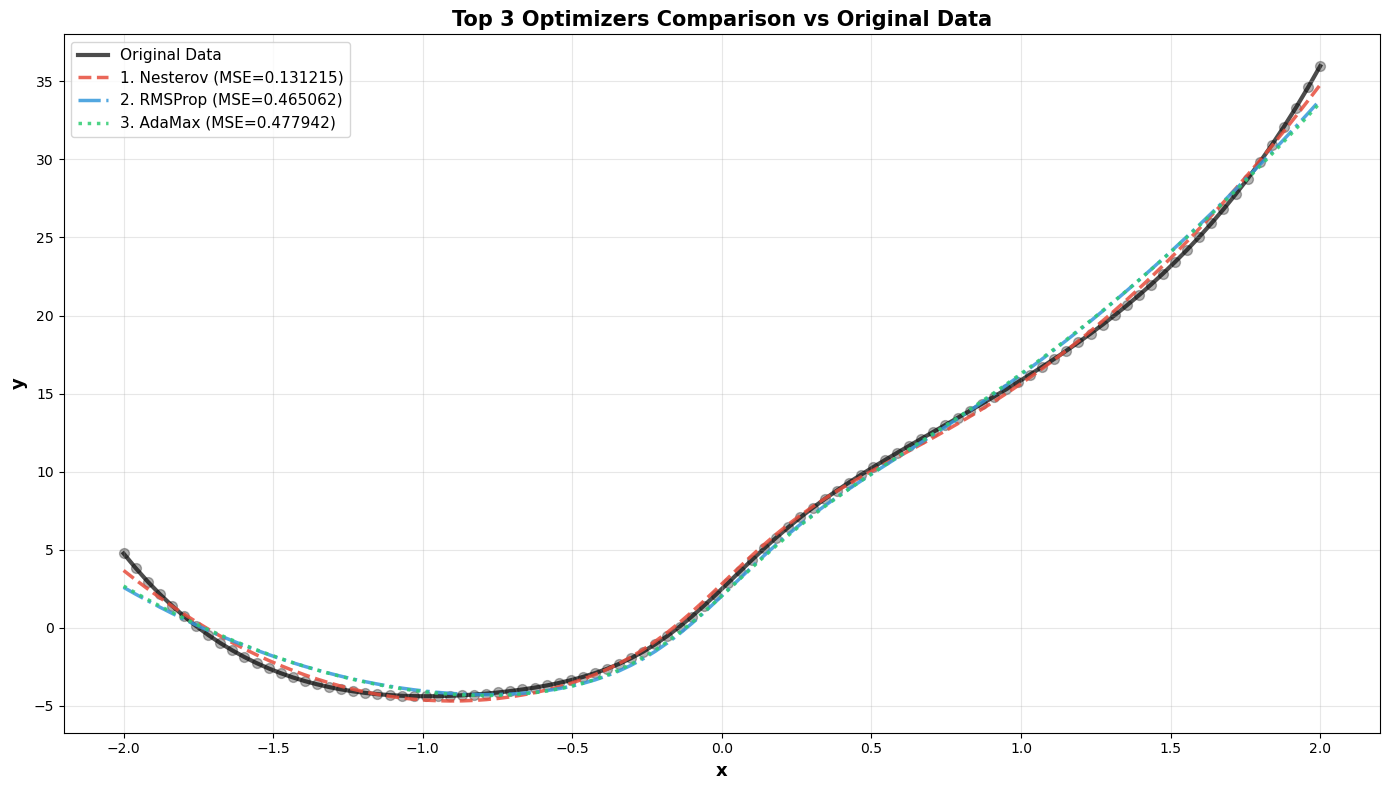

In [ ]:
# Get top 3 optimizers in 'both' mode
top_3_optimizers = results_df['MSE (Both Alphas & Thetas)'].nsmallest(3)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot original data
ax.plot(x_data, y_data, 'k-', linewidth=3, label='Original Data', alpha=0.7, zorder=1)
ax.scatter(x_data, y_data, color='black', s=50, alpha=0.3, zorder=2)

# Plot top 3 models
colors_top3 = ['#e74c3c', '#3498db', '#2ecc71']
linestyles = ['--', '-.', ':']

for idx, (opt_name, mse_value) in enumerate(top_3_optimizers.items()):
    alphas_opt, thetas_opt = final_params[opt_name]
    y_pred = F_model(x_data, alphas_opt, thetas_opt)
    
    ax.plot(x_data, y_pred, linestyle=linestyles[idx], linewidth=2.5, 
            color=colors_top3[idx], 
            label=f'{idx+1}. {opt_name} (MSE={mse_value:.6f})', 
            alpha=0.85)

ax.set_xlabel('x', fontsize=13, fontweight='bold')
ax.set_ylabel('y', fontsize=13, fontweight='bold')
ax.set_title('Top 3 Optimizers Comparison vs Original Data', 
             fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*90)
print(f"{'BEST MODEL PARAMETERS':^90}")
print("="*90)
print(f"\nBest Optimizer: {best_optimizer}")
print(f"Final MSE: {best_mse:.8f}")
print(f"\nOptimized Alpha Parameters:")
print(f"  α₁ = {best_alphas[0]:.6f}")
print(f"  α₂ = {best_alphas[1]:.6f}")
print(f"  α₃ = {best_alphas[2]:.6f}")
print(f"  α₄ = {best_alphas[3]:.6f}")
print(f"  α₅ = {best_alphas[4]:.6f}")
print(f"\nOptimized Theta Parameters:")
print(f"  θ₁ = {best_thetas[0]:.6f}")
print(f"  θ₂ = {best_thetas[1]:.6f}")
print(f"  θ₃ = {best_thetas[2]:.6f}")
print("="*90)


                                  BEST MODEL PARAMETERS                                   

Best Optimizer: Nesterov
Final MSE: 0.13121501

Optimized Alpha Parameters:
  α₁ = 7.635322
  α₂ = 4.065477
  α₃ = -3.808785
  α₄ = 6.224646
  α₅ = 8.589725

Optimized Theta Parameters:
  θ₁ = 1.043377
  θ₂ = 2.978198
  θ₃ = 2.276797
